# Bezier for litter pick up

In [3]:
import numpy as np

In [4]:
import scipy

In [101]:
import matplotlib.pyplot as plt

def plot_points(points):
    # Create a new figure and axes
    fig, ax = plt.subplots()

    # Plot each point from the dictionary
    for name, position in points.items():
        ax.plot(position[0], position[1], 'o', markersize=10, label=name)

    # Add grid lines
    ax.grid(True)

    # Add legend
    ax.legend()

    # Set x and y axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Set title
    ax.set_title('Points')

    # Show the plot
    #plt.show()
    
    return fig, ax
    

def plot_curve(points, fig=None, ax=None):
    # If figure and axes are not provided, create new ones
    if fig is None or ax is None:
        fig, ax = plt.subplots()
        # Add grid lines
        ax.grid(True)
        # Set x and y axis labels
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        # Set title
        ax.set_title('Curve')
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
        
    x_coords = points[:, 0]
    y_coords = points[:, 1]
    
    # Extract x and y coordinates from the points array
    if points.shape[-1] == 3: 
        z_coords = points[:, 2]
        ax.plot(x_coords, y_coords, z_coords, 'o')
        ax.set_zlabel('Z')
    else: 
        ax.plot(x_coords, y_coords, 'o-', markersize=5)

    # Show the plot
    plt.show()
    
    return fig, ax
    
    
def plot_points_3d(points={}, graph_limits={"x":[0, 10], "y":[0, 10], "z":[0, 5]}):
    # Create a new figure and subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Set the graph limits
    ax.set_xlim((graph_limits["x"][0], graph_limits["x"][1]))
    ax.set_ylim((graph_limits["y"][0], graph_limits["y"][1]))
    ax.set_zlim((graph_limits["z"][0], graph_limits["z"][1]))

    # Extract x, y, and z coordinates from the points dictionary
    x = [point[0] for point in points.values()]
    y = [point[1] for point in points.values()]
    z = [point[2] for point in points.values()]

    # Plot the points in 3D
    ax.scatter(x, y, z, c='r', marker='o')

    # Set labels for the axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    #plt.show()
    
    return fig, ax

# Bezier curves

<img src="bezier_eq.png">

<img src="bezier_quad_eq.png">

In [102]:
def create_linear_bezier_curve(p0, p1, p2, start_t=0, end_t=1, dt=0.01): 
    
    p0 = np.array(p0); p1 = np.array(p1); p2 = np.array(p2)
    
    #print(p0, p1, p2)
    
    # Create p in dimension 1, X
    p0 = p0.reshape(1, p0.shape[0])
    p1 = p1.reshape(1, p1.shape[0])
    p2 = p2.reshape(1, p2.shape[0])
    
    # Create t in dimension X, 1
    N = int((end_t - start_t) / dt)
    t = np.linspace(start_t, end_t, N).reshape(N, 1)
    
    # Bezier curve
    B = (1 - t)*((1 - t) * p0 + t*p1) + t*[(1 - t) * p1 + t*p2]
    
    return B.squeeze()

def create_quadratic_bezier_curve(p0, p1, p2, start_t=0, end_t=1, dt=0.01):
    
    p0 = np.array(p0); p1 = np.array(p1); p2 = np.array(p2)
    
    #print(p0, p1, p2)
    
    # Create p in dimension 1, X
    p0 = p0.reshape(1, p0.shape[0])
    p1 = p1.reshape(1, p1.shape[0])
    p2 = p2.reshape(1, p2.shape[0])
    
    # Create t in dimension X, 1
    N = int((end_t - start_t) / dt)
    t = np.linspace(start_t, end_t, N).reshape(N, 1)
    
    # Bezier quadratic curve
    Bquad = ((1-t)**2)*p0 + 2*(1-t)*t*p1 + t**2*p2
    
    return Bquad.squeeze()
    
    # Quadratic Bezier Curve
    

# 1st Scenario

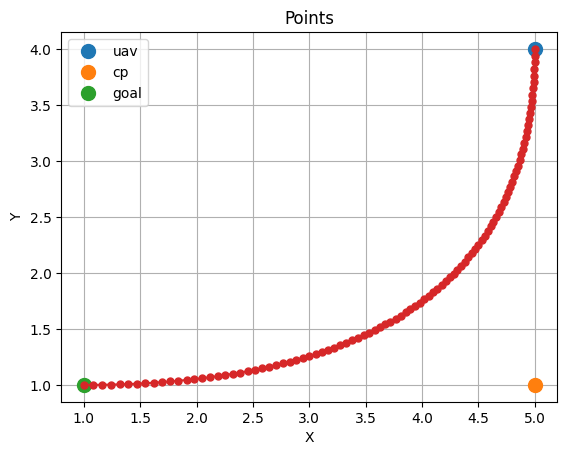

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Points'}, xlabel='X', ylabel='Y'>)

In [103]:
pts_ = {"uav": (5, 4), 
        "cp": (5, 1), 
       "goal": (1, 1)}

fig0, ax0 = plot_points(pts_)
Bquad = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"])
plot_curve(Bquad, fig0, ax0)




# 2nd scenario 3D 

dict_values([(9, 8, 3), (9, 8, 1), (3, 8, 1)])


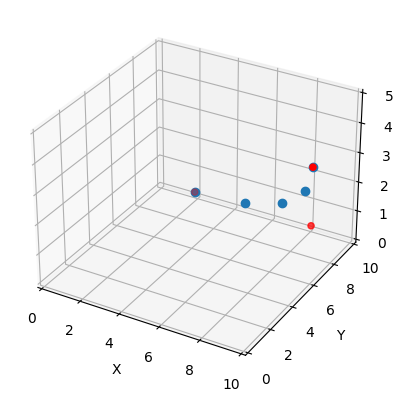

In [106]:
pts_ = {"uav": (9, 8, 3), 
        "cp": (9, 8, 1), 
       "goal": (3, 8, 1)}

print(pts_.values())

fig0, ax0 = plot_points_3d(pts_)
Bquad = create_quadratic_bezier_curve( pts_["uav"], pts_["cp"], pts_["goal"], dt=0.2)
fig0, ax0 = plot_curve(Bquad, fig0, ax0)

    

In [34]:
pt = [pt for pt in pts_.values()]
print(pt)

[(9, 8, 3), (9, 8, 1), (7, 8, 1)]


## Two questions arise: 

- How to plan for the net (ARUCO marker, kinematic chain, it is an end effector for which we are planning) 
- Why bezier (nice position profile)--> use that bezier as a input to the MPC tracker?

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D